# Simple Stock Statistics 

Statistics is a mathematics that deals with data collection, organization, analysis, interpretation and presentation. In addition, statistical analysis use probabilities. 


Stock price in statistics give the probability of rising or falling.

Applied stock to statistics.

## Packages Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import math
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore") 

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

## Input Stock Symbol and Date

In [2]:
# input
symbol = 'AAPL'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
2014-01-03,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2014-01-06,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
2014-01-07,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
2014-01-08,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


## Stock Data Analysis

In [3]:
print("__________________Exploratory Data Analysis__________________")
print("Stock Data")
print('-'*60)
print("Dataset information") 
print(dataset.info(memory_usage='deep',verbose=False))
print('-'*60)
print(dataset.info())
print('-'*60)
print("Data type:")
print(dataset.dtypes)
print('-'*60)
print("Check unique values wihtout NaN")
print(dataset.nunique())
print('-'*60)
print("Data shape:")
print(dataset.shape)
print('-'*60)
print("Data columns Names:")
print(dataset.columns)
print('-'*60)
print("Check for NaNs:")
print(dataset.isnull().values.any())
print('-'*60)
print("Data Statistics Summary:")
print(dataset.describe())

__________________Exploratory Data Analysis__________________
Stock Data
------------------------------------------------------------
Dataset information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Columns: 6 entries, Open to Volume
dtypes: float64(5), int32(1)
memory usage: 63.9 KB
None
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int32
dtypes: float64(5), int32(1)
memory usage: 63.9 KB
None
------------------------------------------------------------
Data type:
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int32
dtype: object
--

## Calculate Stock Daily Returns

In [4]:
# Create Log Returns
dataset['Log_Returns'] = np.log(dataset['Adj Close'].shift(-1)) - np.log(dataset['Adj Close'])

## Histogram of Log Returns

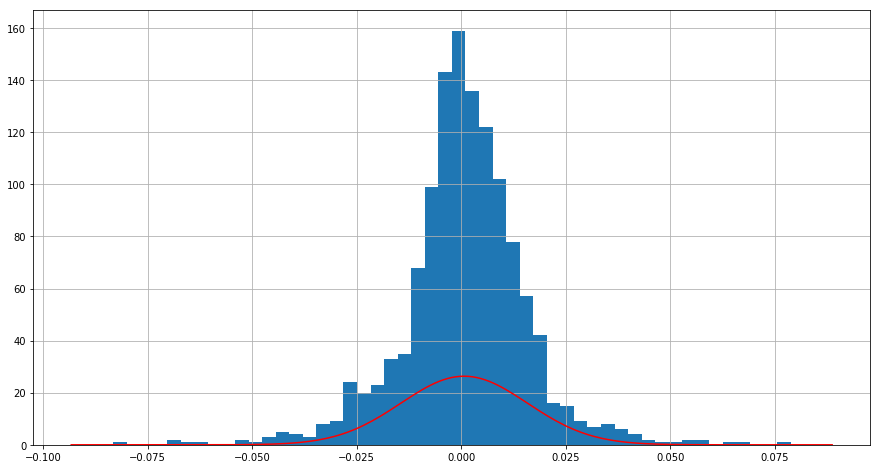

In [5]:
mu = dataset['Log_Returns'].mean()
sigma = dataset['Log_Returns'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(dataset['Log_Returns'].min()-0.01, dataset['Log_Returns'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

dataset['Log_Returns'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

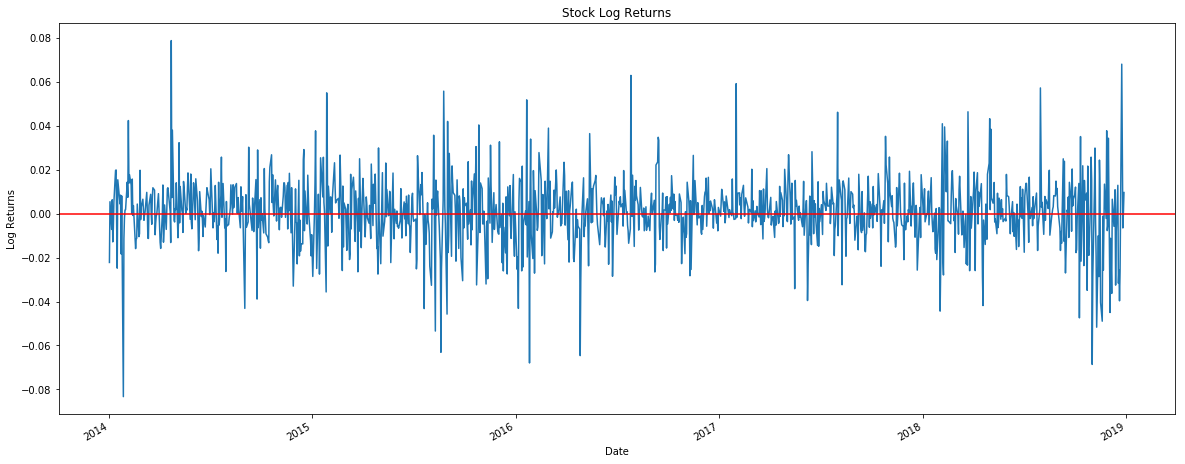

In [6]:
# Log return goes up and down during the period
dataset['Log_Returns'].plot(figsize=(20, 8))
plt.title("Stock Log Returns")
plt.axhline(0, color='red')
plt.ylabel('Log Returns')
plt.show()

## Calculate the probability of the stock price will drop over a certain percentage in a day

In [7]:
drops = [-0.01, -0.05, -0.10, -0.15, -0.20, -0.25, -0.30, -0.35, -0.40, -0.45, -0.50]
for d in drops:
    prob_returns = norm.cdf(d, mu, sigma)
    print('The Probability of', d, 'is', prob_returns)

The Probability of -0.01 is 0.240442527847
The Probability of -0.05 is 0.000410935787335
The Probability of -0.1 is 1.50711215759e-11
The Probability of -0.15 is 1.30700421785e-23
The Probability of -0.2 is 2.34866144412e-40
The Probability of -0.25 is 8.34010885145e-62
The Probability of -0.3 is 5.72414835482e-88
The Probability of -0.35 is 7.50222945271e-119
The Probability of -0.4 is 1.86396725051e-154
The Probability of -0.45 is 8.73761235682e-195
The Probability of -0.5 is 7.70262240044e-240


In [8]:
prob_return = norm.cdf(-0.03, mu, sigma)
print('The Probability is ', prob_return)

The Probability is  0.0214285083264


## Calculate the probability of the stock price will drop over a certain percentage in a year

In [9]:
# There are 252 trading days in a year
# There are exactly 252 trading days in 2019. February has the fewest (19), and October the most (23), with an average of 21 per month, or 63 per quarter. Out of a possible 365 days, 104 days are weekend days (Saturday and Sunday) when the stock exchanges are closed.
# drop over 40% in 220 days
mu225 = 225*mu
sigma225 = (225**0.5) * sigma
print('The probability of dropping over 10% in 225 days is ', norm.cdf(-0.10, mu225, sigma225))

The probability of dropping over 10% in 225 days is  0.133152331582


In [10]:
drops = [-0.01, -0.05, -0.10, -0.15, -0.20, -0.25, -0.30, -0.35, -0.40, -0.45, -0.50]
for d in drops:
    prob_returns = norm.cdf(d, mu225, sigma225)
    print('The Probability of dropping over', d,'% in 225 days is', round(prob_returns, 5))

The Probability of dropping over -0.01 % in 225 days is 0.23714
The Probability of dropping over -0.05 % in 225 days is 0.18631
The Probability of dropping over -0.1 % in 225 days is 0.13315
The Probability of dropping over -0.15 % in 225 days is 0.09149
The Probability of dropping over -0.2 % in 225 days is 0.06037
The Probability of dropping over -0.25 % in 225 days is 0.03822
The Probability of dropping over -0.3 % in 225 days is 0.0232
The Probability of dropping over -0.35 % in 225 days is 0.01349
The Probability of dropping over -0.4 % in 225 days is 0.00751
The Probability of dropping over -0.45 % in 225 days is 0.004
The Probability of dropping over -0.5 % in 225 days is 0.00204


## Calculate Value at Risk (VaR)

Value at risk is a measurment of risk for loss of investment. On the other hand, it estimates how much of investments might lose in a normal market or any market conditions.

In [11]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Stock value at risk ', VaR)

Stock value at risk  -0.0242396439117


## Calculate Quantile

Quantile is a probability that divides in the range of a probability distribution into continuous interval with equal probabilities. 


For example, if we were to look at all of the closing prices for a specific stock for every day in the last year, the top 20% of those prices would represent the upper quintile of the data. The bottom 20% of those prices would represent the lower quintile of the data. There would be three quintiles in between the upper and lower quintiles. The average of all the stock prices typically falls between the second and fourth quintiles, which is the middle point of the data. https://www.investopedia.com/terms/q/quintile.asp

In [12]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.0242396439117
95% quantile  0.025596061538


In [13]:
# Calcuate the 25% and 75% Quantile of the stock's returns
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma) 
print('75% quantile ', q75)

25% quantile  -0.00953962211378
75% quantile  0.0108960397402


## Statistical Hypothesis Tests

Hypothesis test is a statistical method that is used to make statistical decisions for experimental data. In addition, is used for to compare two dataset. 

Statistical tests is used to check if the data has a Gaussian distribution or not

Alpha or α: is the probability of rejecting the null hypothesis when it is true.

P-values: the probability of obtaining an effect at least as extreme as the one in the sample data while assuming the truth of the null hypothesis.

p-value <= alpha: reject H0, not normal.

p-value > alpha: fail to reject H0, normal.

## Calculate test Statistics

In [14]:
# https://www.statisticshowto.datasciencecentral.com/standardized-test-statistic/
mu = dataset['Log_Returns'].mean()
sigma = dataset['Log_Returns'].std(ddof=1)
n = dataset['Log_Returns'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (mu - 0)/(sigma/n**0.5)
print(zhat)

1.5878899198671632


## Set decision criteria

In [15]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.95996398454 1.95996398454


## Decision to reject H0 or not

In [16]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## One Tail Test

In [17]:
# Test one tail
mu = dataset['Log_Returns'].mean()
sigma = dataset['Log_Returns'].std(ddof=1)
n = dataset['Log_Returns'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (mu - 0)/(sigma/n**0.5)
print(zhat)

1.5878899198671632


In [18]:
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.64485362695


In [19]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


## Test for p-value

In [20]:
p_value = 1 - norm.cdf(zhat, 0, 1)
print(p_value)

0.056155616634


In [21]:
print('At significant level of {}, shall we reject: {}'.format(alpha, p_value < alpha))

At significant level of 0.05, shall we reject: False


The stock data is continuous data. Here the list of doing hypothesis test.

For this part, is about comparing features and targets or two samples. Some of the hypothesis testing, we can test one samples.

List of continuous:
https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html

## Shapiro-Wilk Test

In [22]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
import scipy as sp


W_test, p_value = shapiro(dataset['Log_Returns'])

In [23]:
# confidence level is 95%, that is, alpha=0.05
print('Shapiro-Wilk Test')
print('-'*40)

alpha = 0.05
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0: the sample has a Gaussian distribution.")
    print("The null hypothesis can be rejected")
else:
    print("H1: the sample does not have a Gaussian distribution.")
    print("The null hypothesis cannot be rejected")

Shapiro-Wilk Test
----------------------------------------
H1: the sample does not have a Gaussian distribution.
The null hypothesis cannot be rejected


## D’Agostino’s K^2 Test

In [24]:
# Anderson_Darling Test
from scipy.stats import anderson

result = anderson(dataset['Log_Returns'])
result

AndersonResult(statistic=nan, critical_values=array([ 0.574,  0.654,  0.785,  0.915,  1.089]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [25]:
print('D’Agostino’s K^2 Test')
print('-'*40)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

D’Agostino’s K^2 Test
----------------------------------------
Statistic: nan
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


The correlation is used to test out the samples or features is correlation or not.

Therefore, to check two samples or features are related or not.

## # Pearson’s Correlation Coefficient

In [26]:
from scipy.stats import pearsonr

coef, p_value = pearsonr(dataset['Open'], dataset['Adj Close'])

In [27]:
print('Pearson’s Correlation Coefficient')
print('-'*40)
print('Correlation Test: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p_value > alpha:
	print('H0: the two samples are independent. p=%.3f' % p_value)
else:
	print('H1: there is a dependency between the samples. p=%.3f' % p_value)

Pearson’s Correlation Coefficient
----------------------------------------
Correlation Test: 0.998
H1: there is a dependency between the samples. p=0.000


## Spearman's Rank Correlation

In [28]:
# Spearman's Rank Correlation
from scipy.stats import spearmanr

coef, p_value = spearmanr(dataset['Open'], dataset['Adj Close'])

In [29]:
print('Spearman’s Rank Correlation')
print('-'*40)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p_value > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_value)

Spearman’s Rank Correlation
----------------------------------------
Spearmans correlation coefficient: 0.996
Samples are correlated (reject H0) p=0.000


## Kendall's Rank Correlation 

In [30]:
# Kendall's Rank Correlation
from scipy.stats import kendalltau

coef, p_value = kendalltau(dataset['Open'], dataset['Adj Close'])

In [31]:
print('Kendall’s Rank Correlation')
print('-'*40)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_value)

Kendall’s Rank Correlation
----------------------------------------
Kendall correlation coefficient: 0.953
Samples are correlated (reject H0) p=0.000


## Chi-Squared Test

In [32]:
# Chi-Squared Test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p_value, dof, expected = chi2_contingency(dataset[['Open','Low','High','Adj Close','Volume']])

In [33]:
# interpret test-statistic
print('Chi-Squared Test')
print('-'*40)

prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Chi-Squared Test
----------------------------------------
Dependent (reject H0)


In [34]:
# interpret p-value
alpha = 1.0 - prob
if p_value <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [35]:
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=5028
[[  1.79341454e+02   1.77772007e+02   1.80882430e+02   1.72125252e+02
    5.86707947e+07]
 [  2.99915291e+02   2.97290682e+02   3.02492288e+02   2.87847533e+02
    9.81160132e+07]
 [  3.15308232e+02   3.12548917e+02   3.18017492e+02   3.02621105e+02
    1.03151748e+08]
 ..., 
 [  1.62365169e+02   1.60944284e+02   1.63760278e+02   1.55832046e+02
    5.31170753e+07]
 [  1.29274227e+02   1.28142927e+02   1.30385005e+02   1.24072592e+02
    4.22915143e+07]
 [  1.06997287e+02   1.06060936e+02   1.07916652e+02   1.02692013e+02
    3.50037078e+07]]
probability=0.950, critical=5194.074, stat=335688.814
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


This part is to compare two samples or features; as a results, to check if they both independent samples.

## Parametric Statistical Hypothesis Tests

T-test for the means of two independent samples of scores
Two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values

In [36]:
# Parametric Statistical Hypothesis Tests
# Student’s t-test
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(dataset['Open'], dataset['Adj Close'])

In [37]:
print('Paired Students t-Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Paired Students t-Test
----------------------------------------
Statistics=3.450, p=0.001
Different distributions (reject H0)


## Paired Student’s t-test

In [38]:
# Paired Student’s t-test
from scipy.stats import ttest_rel

stat, p_value = ttest_rel(dataset['Open'], dataset['Adj Close'])

In [39]:
print('Paired Students t-Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Paired Students t-Test
----------------------------------------
Statistics=62.959, p=0.000
Different distributions (reject H0)


## Analysis of Variance Test (ANOVA)

In [40]:
# Analysis of Variance Test (ANOVA)
from scipy.stats import f_oneway

stat, p_value = f_oneway(dataset['Open'], dataset['Adj Close'], dataset['Volume'])

In [41]:
print('Analysis of Variance Test (ANOVA)')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Analysis of Variance Test (ANOVA)
----------------------------------------
Statistics=4168.958, p=0.000
Different distributions (reject H0)


## Mann-Whitney U Test

In [42]:
# Nonparametric Statistical Hypothesis Tests
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(dataset['Open'], dataset['Adj Close'])

In [43]:
print('Mann-Whitney U Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Mann-Whitney U Test
----------------------------------------
Statistics=707543.000, p=0.000
Different distribution (reject H0)


## Wilcoxon Signed-Rank Test

In [44]:
# Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(dataset['Open'], dataset['Adj Close'])

In [45]:
print('Wilcoxon Signed-Rank Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Wilcoxon Signed-Rank Test
----------------------------------------
Statistics=7095.000, p=0.000
Different distribution (reject H0)


## Kruskal-Wallis Test

In [46]:
# Kruskal-Wallis Test
from scipy.stats import kruskal

stat, p_value = kruskal(dataset['Open'], dataset['Adj Close'], dataset['Volume'])

In [47]:
print('Kruskal-Wallis Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Kruskal-Wallis Test
----------------------------------------
Statistics=2524.724, p=0.000
Different distributions (reject H0)


## Friedman Test

In [48]:
from scipy.stats import friedmanchisquare

stat, p_value = friedmanchisquare(dataset['Open'], dataset['Adj Close'], dataset['Volume'])

In [49]:
print('Friedman Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Friedman Test
----------------------------------------
Statistics=2429.219, p=0.000
Different distributions (reject H0)


## Levene Test

In [50]:
# Levene Test
from scipy.stats import levene

stat, p_value = levene(dataset['Open'], dataset['Adj Close'])

In [51]:
print('Levene Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Levene Test
----------------------------------------
Statistics=1.310, p=0.252
Same distributions (fail to reject H0)


## Mood’s test

In [52]:
from scipy.stats import mood

stat, p_value = mood(dataset['Open'], dataset['Adj Close'])

In [53]:
print('Mood Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mood Test
----------------------------------------
Statistics=-4.115, p=0.000
Different distributions (reject H0)


## Mood’s median test

In [54]:
from scipy.stats import median_test

stat, p_value, med, tbl = median_test(dataset['Open'], dataset['Adj Close'], dataset['Volume'])

In [55]:
print('Mood’s median test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mood’s median test
----------------------------------------
Statistics=1888.528, p=0.000
Different distributions (reject H0)


In [56]:
stat, p_value, med, tbl = median_test(dataset['Open'], dataset['Adj Close'], dataset['Volume'],lambda_="log-likelihood")

In [57]:
print('Mood’s median test with lambda')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mood’s median test with lambda
----------------------------------------
Statistics=2404.242, p=0.000
Different distributions (reject H0)


## Kolmogorov-Smirnov Test

In [58]:
# Kolmogorov-Smirnov test
from scipy.stats import ks_2samp

stat, p_value = ks_2samp(dataset['Open'], dataset['Adj Close'])

In [59]:
print('Kolmogorov-Smirnov Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Kolmogorov-Smirnov Test
----------------------------------------
Statistics=0.125, p=0.000
Different distributions (reject H0)


## Box-Cox Power Transformation

In [60]:
from scipy.stats import boxcox

dataset['boxcox'], lam = boxcox(dataset['Adj Close'])

In [61]:
print('Lambda: %f' % lam)

Lambda: -0.153051


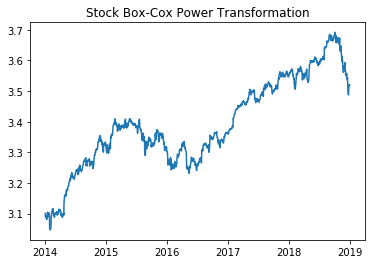

In [62]:
# Plot line
plt.title('Stock Box-Cox Power Transformation')
plt.plot(dataset['boxcox'])
plt.show()

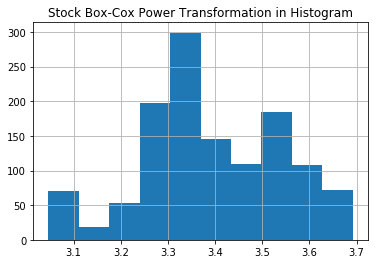

In [63]:
# Plot histogram
plt.title('Stock Box-Cox Power Transformation in Histogram')
plt.hist(dataset['boxcox'])
plt.grid()
plt.show()